<a href="https://colab.research.google.com/github/Hari-385/Prodigy-_internship/blob/main/Prodigy_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving test.csv to test.csv
Initial Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Data After Cleaning:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   333.000000  333.000000  33

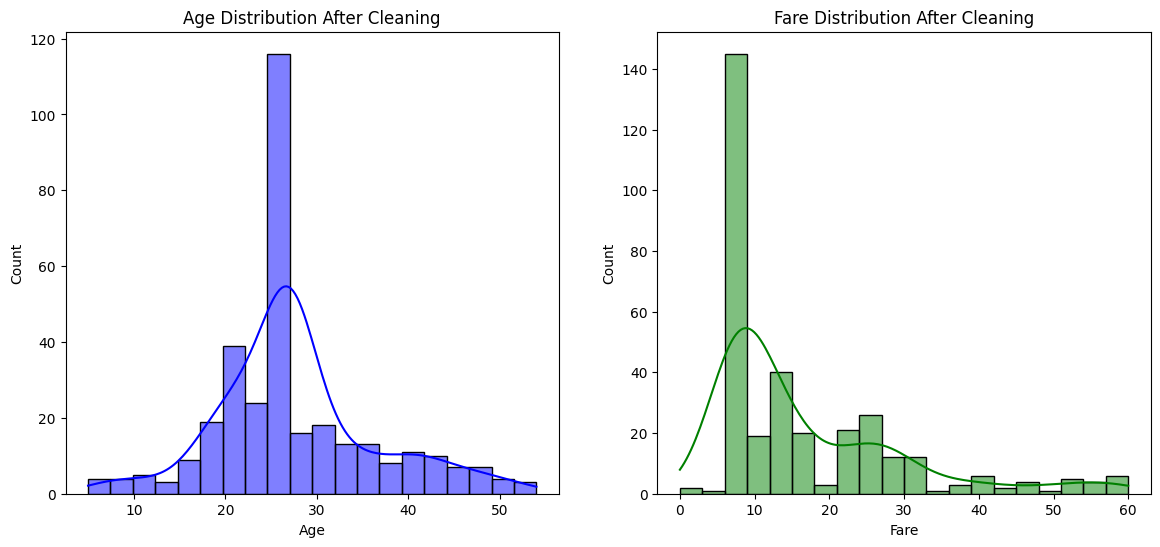


Cleaned Data Sample:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
5  14.0      0      0     7538   9.2250   NaN        S  


In [ ]:
# Step 1: Upload the CSV file in Google Colab
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the CSV file
uploaded = files.upload()

# Step 2: Load the CSV file into a pandas DataFrame
filename = list(uploaded.keys())[0]  # Get the name of the uploaded file
df = pd.read_csv(filename)

# Step 3: Display the first few rows of the data
print("Initial Data:")
print(df.head())

# Step 4: Handling missing values
# Filling missing numeric values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# If Ticket is categorical, fill with the most frequent value
df['Ticket'].fillna(df['Ticket'].mode()[0], inplace=True)

# Step 5: Handling outliers using IQR (Interquartile Range) method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Remove outliers from Age and Fare
df_cleaned = remove_outliers_iqr(df, 'Age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Fare')

print("\nData After Cleaning:")
print(df_cleaned.describe())

# Step 6: Visualize the cleaned data

# Plot distribution of 'Age' and 'Fare' after cleaning
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution After Cleaning')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution After Cleaning')

plt.show()

# Step 7: Show a few cleaned records
print("\nCleaned Data Sample:")
print(df_cleaned.head())